In [1]:
# import the modules
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")



### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here
train = pd.read_csv('train.csv')
train.head(5)

,Id,Unnamed: 0,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,...,attr1080,attr1081,attr1082,attr1083,attr1084,attr1085,attr1086,attr1087,attr1088,attr1089
0,2216,2216,-4.374765,13.819856,14.656331,-9.728919,-19.334897,0.344455,11.10572,21.977302,...,89.083581,86.194838,93.162055,100.883355,123.558503,112.831384,100.583377,102.194939,120.306692,0
1,2673,2673,-13.796261,-4.647589,21.676617,-0.122074,11.228644,-8.806895,-9.16119,18.025709,...,100.750899,83.373142,76.902208,72.182997,102.843819,93.118477,80.338570,80.196648,93.995657,0
2,5603,5603,-2.115400,-3.332400,-6.640000,-13.825000,4.123200,27.365000,6.70020,3.783000,...,52.917000,34.799000,42.562000,51.161000,77.139000,73.367000,50.733000,39.949000,60.731000,0
3,6401,6401,-25.531000,66.699000,-13.025000,-31.198000,12.016000,19.365000,5.04510,20.418000,...,49.488000,71.633000,66.757000,69.213000,97.606000,81.416000,53.808000,41.489000,71.825000,0
4,6043,6043,18.993000,-5.620000,-9.964900,3.307200,0.999760,-10.920000,-11.39200,3.918500,...,84.508000,89.976000,61.169000,33.132000,58.043000,54.522000,80.941000,53.000000,80.615000,1


In [3]:
train.shape

(5892, 1092)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Columns: 1092 entries, Id to attr1089
dtypes: float64(1089), int64(3)
memory usage: 49.1 MB


In [4]:
train.describe()

,Id,Unnamed: 0,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,...,attr1080,attr1081,attr1082,attr1083,attr1084,attr1085,attr1086,attr1087,attr1088,attr1089
count,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,...,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000
mean,3681.340292,3681.340292,-0.373974,-1.762581,-2.399157,-0.880143,1.465430,2.372116,2.646721,1.307644,...,64.355592,64.060565,65.151470,65.760824,73.686637,72.352308,66.460347,65.761215,71.488944,0.522743
std,2122.502005,2122.502005,19.005061,18.904327,19.708097,19.498525,19.246788,19.007280,18.665336,18.628544,...,27.608675,27.160091,26.302320,27.853332,31.177951,30.378555,29.839891,30.972092,31.880657,0.499525
min,0.000000,0.000000,-101.232277,-109.938104,-122.710953,-130.233622,-121.622267,-113.427107,-115.792626,-113.502901,...,-0.885401,-6.213108,-13.505425,-5.031128,-4.929334,-6.497632,-12.916041,-13.147479,-10.248464,0.000000
25%,1860.500000,1860.500000,-9.974910,-10.567912,-11.342409,-9.517605,-7.759939,-6.992407,-6.411782,-8.314056,...,43.626956,44.151937,45.818750,44.788432,50.747149,49.581948,44.687840,42.196264,47.328044,0.000000
50%,3666.500000,3666.500000,-1.169285,-1.734872,-1.916882,-0.694444,0.778408,1.191996,1.472211,0.332601,...,65.892997,65.445500,66.711206,67.267985,76.424331,75.085000,68.381334,67.002327,75.015546,1.000000
75%,5529.250000,5529.250000,8.088711,6.708988,6.939261,8.372789,10.025869,11.309062,10.545387,9.940408,...,83.027536,82.445932,82.609121,85.014764,94.923375,92.585118,86.712733,86.658053,92.341037,1.000000
max,7363.000000,7363.000000,103.030000,98.758000,117.847134,133.952332,119.970291,120.372886,138.168220,150.041348,...,140.886327,153.401666,154.504591,154.165419,169.285543,163.534993,151.976611,180.600246,193.055151,1.000000


In [5]:
train.skew()

Id            0.000294
Unnamed: 0    0.000294
attr0         0.377495
attr1         0.041836
attr2        -0.168225
                ...   
attr1085      0.001308
attr1086      0.091484
attr1087      0.130646
attr1088      0.022489
attr1089     -0.091088
Length: 1092, dtype: float64

In [6]:
# Code ends here

### Visualize the data

- Check the distribution of the target variable. Is the data imbalanced?
- Clean the data, apply some data preprocessing and engineering techniques.

In [7]:
# Code starts here

<AxesSubplot:xlabel='attr1089', ylabel='count'>

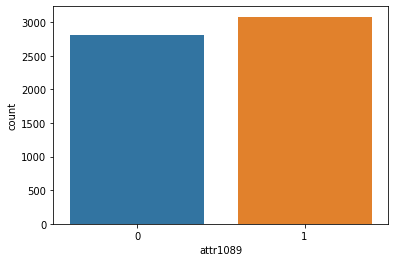

In [8]:
#train['attr1089'].value_counts().plot(kind='bar')
sns.countplot(x='attr1089', data=train)

In [9]:
# Code ends here.

### Model building

- Split the data into train and test.
- Now let's come to the actual task, predict the values of `attr1089` after building a Machine learning model.
- Try improving upon the `roc_auc_score` ([ROC-AUC Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score))

In [11]:
# Code Starts here
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

# Separate into train and test data
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=0,test_size=0.3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(4124, 1091) (1768, 1091) (4124,) (1768,)


In [12]:
# Fitting a Random Forest model on the train data and predict on the test data
# It will take a long time to execute
model = RandomForestClassifier(n_estimators=100,random_state=8,n_jobs=4)
rfe = RFE(model, 42)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_val)
model.fit(X_train_rfe,y_train)
y_pred_rfe = model.predict(X_test_rfe)
print(roc_auc_score(y_val,y_pred_rfe))

0.9118411000763942


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [13]:
test = pd.read_csv('test.csv')
# Storing the id from the test file
id_ = test['Id']

# Applying rfe on test data
test_rfe = rfe.transform(test)

# Predict on the test data
y_pred_test = model.predict(test_rfe)

# Create a sample submission file
final_submission = pd.DataFrame({'Id':id_,'attr1089':y_pred_test})

# Convert the sample submission file into a csv file
final_submission.to_csv('sample_submission_result.csv',index=False)

# Code ends here